In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns


In [2]:
data = pd.read_csv('C:/Users/fateh/Desktop/Tableau Case Study/hour.csv')

In [3]:
data.describe

<bound method NDFrame.describe of        instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
5            6  2011-01-01       1   0     1   5        0        6   
6            7  2011-01-01       1   0     1   6        0        6   
7            8  2011-01-01       1   0     1   7        0        6   
8            9  2011-01-01       1   0     1   8        0        6   
9           10  2011-01-01       1   0     1   9        0        6   
10          11  2011-01-01       1   0     1  10        0        6   
11          12  2011-01-01       1   0     1  11        0        6   
12          13  2011-01-01       1   0     1  12        

In [4]:
data.shape

(17379, 17)

In [5]:
#Missing values
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [7]:
data = data.drop(['instant','dteday','casual','registered','yr'],axis=1)

In [8]:
#Defining categorical variables
data['season'] = data.season.astype('category')
data['mnth'] = data.mnth.astype('category')
data['hr'] = data.hr.astype('category')
data['holiday'] = data.holiday.astype('category')
data['weekday'] = data.weekday.astype('category')
data['workingday'] = data.workingday.astype('category')
data['weathersit'] = data.weathersit.astype('category')

In [9]:
corr=data.corr()
corr.tail(1)

,temp,atemp,hum,windspeed,cnt
cnt,0.404772,0.400929,-0.322911,0.093234,1.0


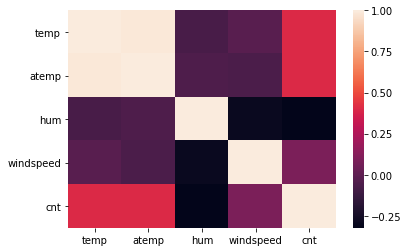

In [10]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E2C3DC2278>,
      dtype=object)

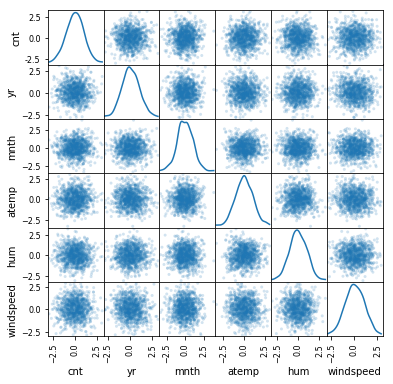

In [11]:
from pandas.plotting import scatter_matrix
df = pd.DataFrame(np.random.randn(1000, 6), columns = ['cnt', 'yr', 'mnth', 'atemp', 'hum', 'windspeed'])
scatter_matrix(df, alpha = 0.2, figsize = (6, 6), diagonal = 'kde')

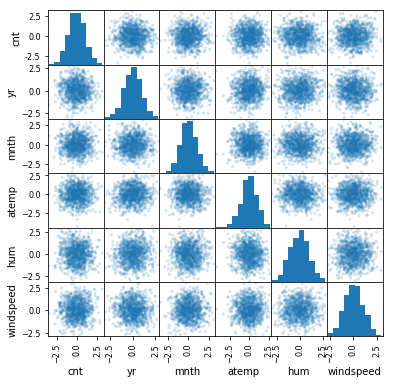

In [12]:
df = pd.DataFrame(np.random.randn(1000, 6), columns = ['cnt', 'yr', 'mnth', 'atemp', 'hum', 'windspeed'])
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(6, 6))
plt.show()

C:\Users\fateh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0.5, 1.0, 'Monthly distribution')]

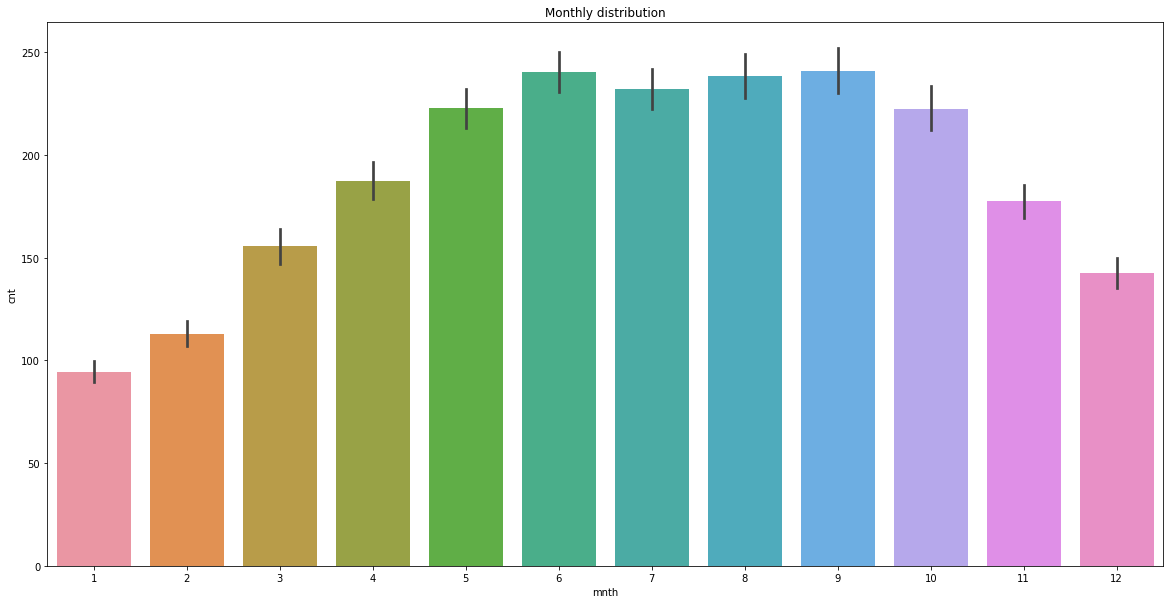

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=data[['mnth',
                      'cnt']],
            x='mnth', y='cnt')
ax.set(title="Monthly distribution")

[Text(0.5, 1.0, 'Daily distribution')]

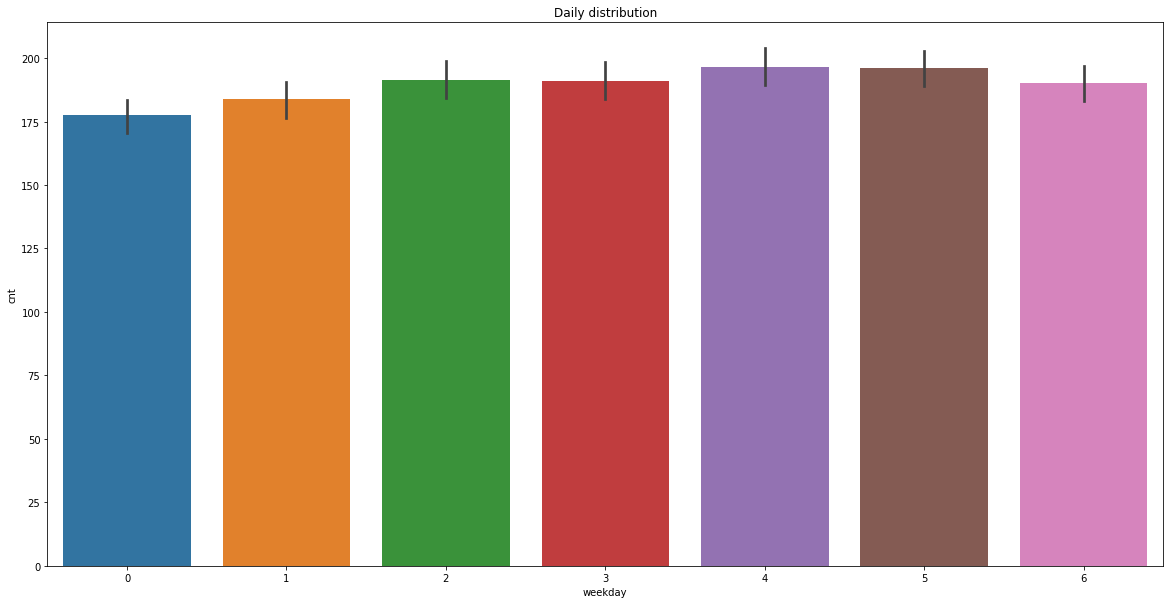

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=data[['weekday',
                      'cnt']],
            x='weekday', y='cnt')
ax.set(title="Daily distribution")

In [16]:
#Feature Selection
Y = data['cnt']
X = data.drop(['cnt'],axis=1)

print ('X shape is : ', X.shape)
print('Y shape is : ', Y.shape)


X shape is :  (17379, 11)
Y shape is :  (17379,)


In [17]:
#Creating train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size = 0.3)



Text(0, 0.5, 'Predicted Y')

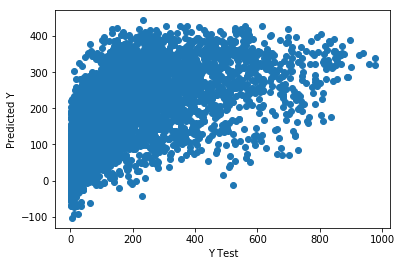

In [18]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict( X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')



In [24]:
lm.score(X_test,y_test)

0.34431592310802117

In [19]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 107.30460137123177
MSE: 21663.575025002992
RMSE: 147.18551227958204


In [20]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
season,19.663550
mnth,0.433811
hr,7.466369
holiday,-21.440328
weekday,1.917615
workingday,2.916417
weathersit,-2.440591
temp,45.307579
atemp,272.361448
hum,-216.944991
